In [3]:
# Install the required packages:
# !pip install -r requirements.txt

In [1]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib.colors import ListedColormap
from matplotlib import cm
from scipy import signal
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets
import time
import random
import mplcursors
from matplotlib.animation import FuncAnimation, PillowWriter
from numpy.random import rand
from scipy.stats import pearsonr
import ipywidgets as widgets

# Import the required functions
from isingsim_funcs import *

%matplotlib widget 
# Makes all interactive plots possible, both on vscode and Jupyter notebooks

# %matplotlib qt 
# Restart the kernel and uncomment this line to show plots in a separate window instead

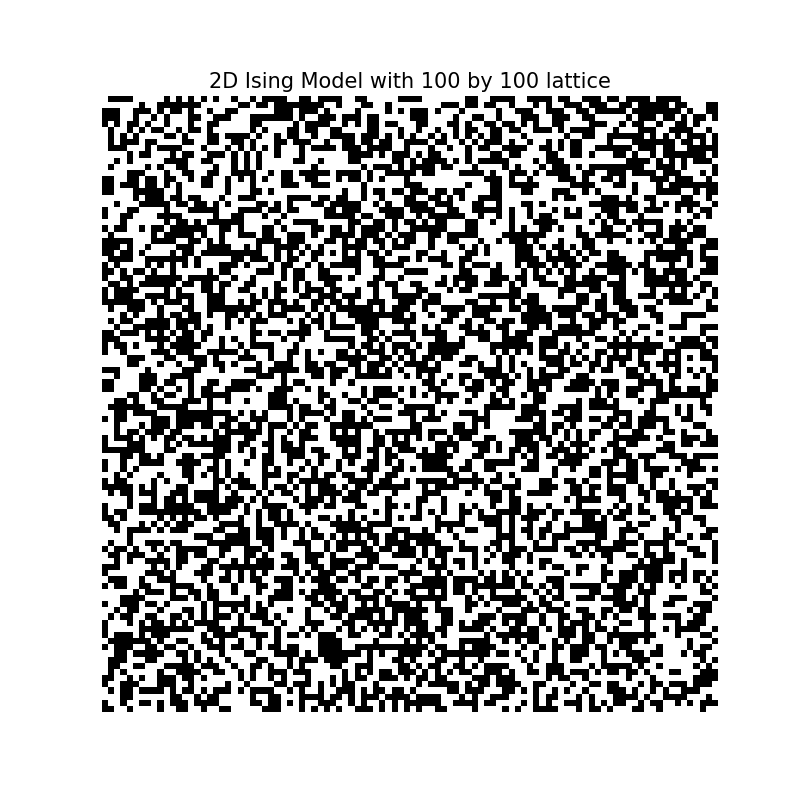

In [2]:
# Parameters
N = 100  # grid size
J = 1
kT = 2/np.log(1+np.sqrt(2))*0.85  # Below critical temperature

# Sampling parameters
reInitialize = True
p = 0.5  # proportion of initial +1 spins
samplingMethod = 'Metropolis'

# Set time points based on sampling method
if samplingMethod in ['Metropolis', 'HeatBath']:
    numTimePoints = 100*N**2
    everyT = N**2
elif samplingMethod == 'Wolff':
    numTimePoints = 100*N 
    everyT = int(0.5*N)

# Generate initial configuration
grid = np.sign(p - np.random.random((N, N)))

# Run simulation
finalGrid, energies, magnetizations, grid_history, animate_func = SampleGrid(
    grid, kT, J, numTimePoints, everyT, samplingMethod)

# Create animation
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(grid_history[0], cmap='binary', vmin=-1, vmax=1)
ax.set_title(f'2D Ising Model with {N} by {N} lattice', size=15)
plt.axis('off')

# Text annotation for energy and magnetization
time_text = ax.text(0.15, -0.04, '', transform=ax.transAxes, color='k')

def update(i):

    im.set_array(grid_history[i])
    M = np.sum(grid_history[i]) / grid_history[i].size
    E = IsingEnergy(grid_history[i], J)
    time_text.set_text(f'J = {J}, kT = {kT:.2f}, M = {M:.3f}, E = {E:.3f}')
    time_text.set_fontsize(15)

    return im, time_text

# Create animation
from matplotlib.animation import FuncAnimation
ani = FuncAnimation(fig, update, frames=len(grid_history), 
                    interval=200, blit=True, repeat=False) # Change speed by varying "interval"


# To also save the animation as a gif, uncomment this:
# writer = PillowWriter(fps=15)
# ani.save('ising.gif', writer=writer)

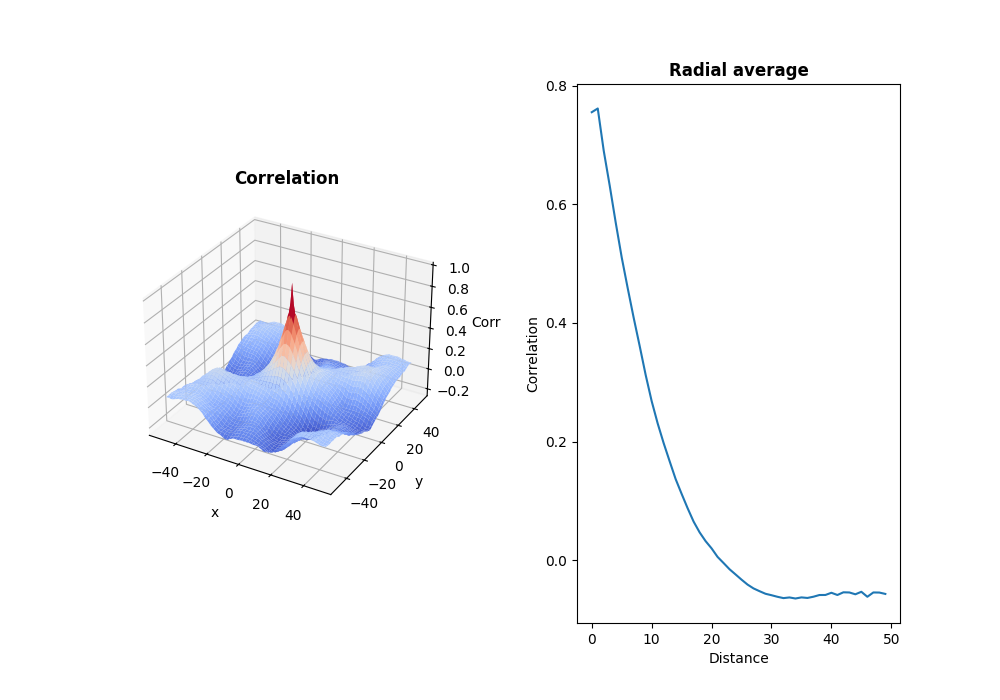

In [3]:
fig = plt.figure(figsize=(10, 7))
plt.subplots_adjust(wspace=0.4)  

ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122) 

# Calculate correlation matrix 
corrMatrix = CorrelationFun(finalGrid)

# Create meshgrid
X, Y = np.meshgrid(np.arange(-N/2, N/2), np.arange(-N/2, N/2))

# Create 3D surface plot
# ax = plt.gca(projection='3d')
surf = ax1.plot_surface(X, Y, corrMatrix, cmap='coolwarm')

# Set labels and title
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('Corr')
ax1.set_title('Correlation', fontweight='bold')

# Plot radial average
R = RadialAverage(corrMatrix, N) 
ax2.plot(R)
ax2.set_xlabel('Distance')
ax2.set_ylabel('Correlation')
ax2.set_title('Radial average', fontweight='bold')

plt.show()

# Add cursor to click over line plot and get coordinate info
cursor = mplcursors.cursor(ax2.get_lines(), hover=False)  

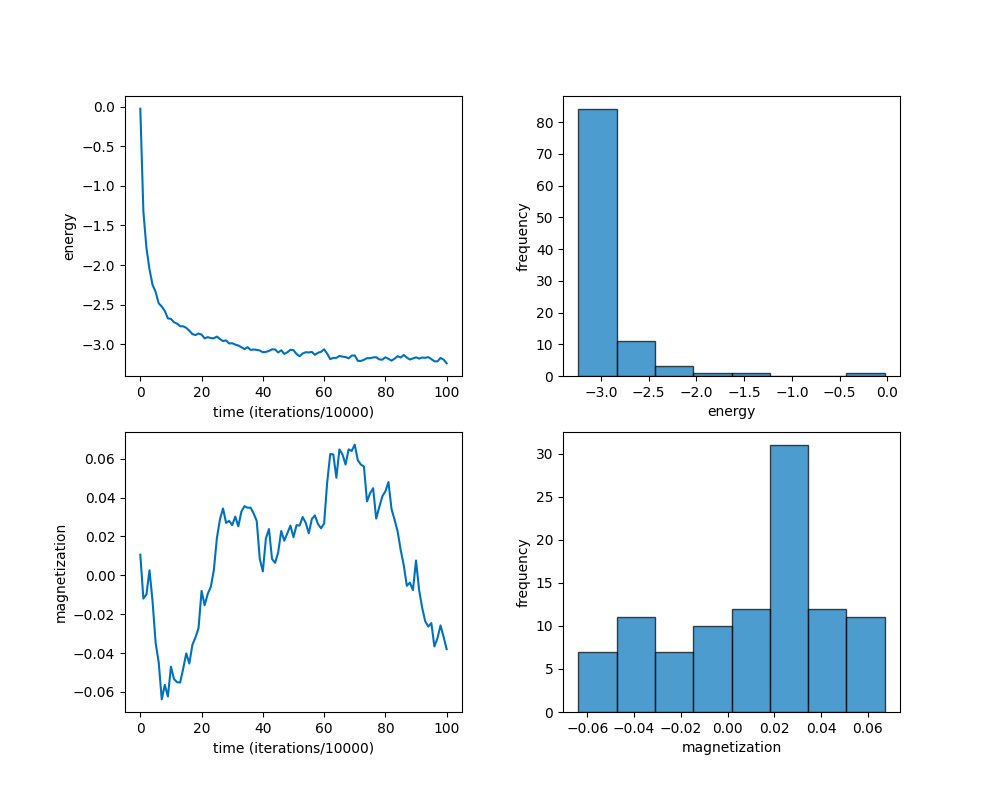

In [4]:
# Create figure with analysis of magnetization and energy behaviour
# once animation has been run

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3)

ax_en, ax_en_hist = axes[0]  
ax_mag, ax_mag_hist = axes[1]    

custom_blue = (0, 0.4470, 0.7410)

# Plot energy
ax_en.plot(energies, color=custom_blue)
ax_en.set_xlabel(f'time (iterations/{everyT})')
ax_en.set_ylabel('energy')

# Plot energy histogram
ax_en_hist.hist(energies, bins='sturges', color=custom_blue, alpha=0.7, edgecolor='black')
ax_en_hist.set_xlabel('energy')
ax_en_hist.set_ylabel('frequency')

# Plot magnetization
ax_mag.plot(magnetizations, color=custom_blue)
ax_mag.set_xlabel(f'time (iterations/{everyT})')
ax_mag.set_ylabel('magnetization')

#Plot magnetization histogram
ax_mag_hist.hist(magnetizations, bins='sturges', color=custom_blue, alpha=0.7, edgecolor='black')
ax_mag_hist.set_xlabel('magnetization')
ax_mag_hist.set_ylabel('frequency')

plt.show()

# Enable cursors upon clicking on a point:
cursor = mplcursors.cursor(ax_en.get_lines(), hover=False)  
cursor = mplcursors.cursor(ax_mag.get_lines(), hover=False) 